### Perceptron
- It is a single layer artificial neural network
- It acts as a linear classifier (for binary classification)
- **Loss Function**: Binary Cross Entropy (negative log likelihood)
- **Optimization**: Gradient Descent / Stochastic Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

#### Data Generation

In [2]:
'''a, b = make_classification(n_samples=1000, n_features = 2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
plt.style.use("seaborn")
plt.scatter(a[:,0], a[:, 1], c = b, cmap = plt.cm.Accent)
plt.show()'''

'a, b = make_classification(n_samples=1000, n_features = 2, n_informative=2, n_redundant=0, n_clusters_per_class=1)\nplt.style.use("seaborn")\nplt.scatter(a[:,0], a[:, 1], c = b, cmap = plt.cm.Accent)\nplt.show()'

In [3]:
'''print(a.shape, b.shape)'''

'print(a.shape, b.shape)'

(8000, 2) (8000,)


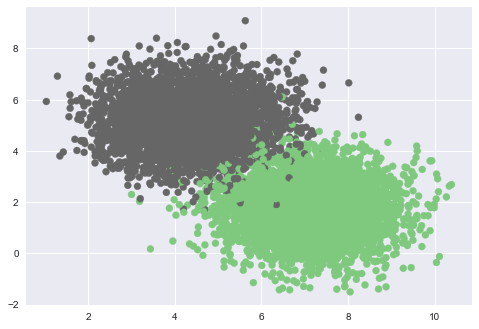

In [4]:
X, Y = make_blobs(n_samples=8000, n_features=2, centers=2)
print(X.shape, Y.shape)
plt.style.use("seaborn")
plt.scatter(X[:,0], X[:, 1], c = Y, cmap = plt.cm.Accent_r)
plt.show()

#### Model and Helper Functions

In [5]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

In [6]:
print(sigmoid(10))
z = np.array([1,2,3,4,5])
print(sigmoid(z))         # Broadcasting on np array

0.9999546021312976
[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]


#### Implement Perceptron Learning Algorithm:
- Learn weights
- Reduce loss
- Make predictions

In [7]:
"""
    X => m x (n+1) matrix
    W => n x 1 vector
"""

def predict(X, weights):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions

def loss(X, Y, weights):
    # Binary Cross Entropy
    Y_ = predict(X, weights)
    cost = np.mean(- Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

# dw = (y^ - y) * xj for each of the i training examples

# Y_ - Y => m x 1
# X => m x (n+1)
# W => (n+1) x 1

def update(X, Y, weights, lr):
    Y_ = predict(X, weights)
    dw = np.dot(X.T, (Y_ - Y))
    m = X.shape[0]
    
    weights = weights - lr*dw/float(m)
    return weights
    
def train(X, Y, lr=0.5, maxEpochs=100):
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))
    
    weights = np.random.randn(X.shape[1])
    
    for epoch in range(maxEpochs):
        weights = update(X, Y, weights, lr)
        if (epoch%10000 == 0 or epoch==maxEpochs-1):
            l = loss(X, Y, weights)
            print("Epoch: [%d/%d], Loss: %.4f"%(epoch, maxEpochs, l))
    return weights

In [8]:
weights = train(X, Y, lr=0.8,maxEpochs=50000)
print(weights)

Epoch: [0/50000], Loss: 3.8101
Epoch: [10000/50000], Loss: 0.0393
Epoch: [20000/50000], Loss: 0.0392
Epoch: [30000/50000], Loss: 0.0392
Epoch: [40000/50000], Loss: 0.0392
Epoch: [49999/50000], Loss: 0.0392
[-4.30016718  2.71458476 -3.28508644]


In [9]:
x = np.linspace(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, num=20)
y = -(weights[0] + weights[1]*x)/weights[2]

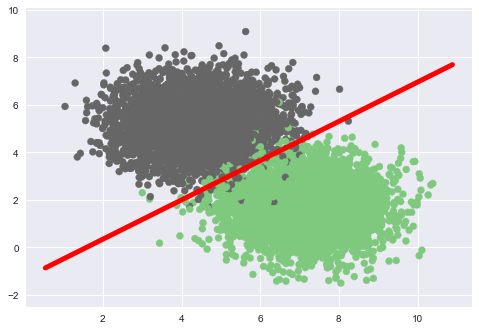

In [14]:
plt.style.use("seaborn")
plt.scatter(X[:,0], X[:, 1], c = Y, cmap = plt.cm.Accent_r)
plt.plot(x, y, linewidth=5, animated=True, c='red')
plt.xlim(np.min(X[:,0])-1,np.max(X[:,0])+1)
plt.ylim(np.min(X[:,1])-1,np.max(X[:,1])+1)
plt.show()

In [11]:
def getPredictions(X_test, weights, labels=True):
    if (X_test.shape[1] != weights.shape[0]):
        ones = np.zeros((X_test.shape[0],1))
        X_test = np.hstack((ones, X_test))
        
    probabilities = predict(X_test, weights)
    if not labels:
        return probabilities
    else:
        pred_labels = np.zeros(probabilities.shape)
        pred_labels[probabilities >= 0.5] = 1
        return pred_labels
    
def get_accuracy(Y, Y_):
    return np.sum(Y_ == Y)/Y.shape[0]

In [12]:
Y_ = getPredictions(X, weights)
print("Accuracy:", str(get_accuracy(Y,Y_)))

# print(X.shape, Y.shape)

Accuracy: 0.939
